In [1]:
# General hypothesis- We would like to use this data set to see if the pokemon with 
# the highest stats are the hardest to capture.

In [2]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Load in pkmn-go.csv and pokemon-spawns.csv files, create pandas dbs
pkmn_go="Resources/pkmn-go.csv "
pokemon_csv= pd.read_csv(pkmn_go)

bay_area_spawns="Resources/pokemon-spawns.csv "
bay_area_csv= pd.read_csv(bay_area_spawns)


In [3]:
pokemon_csv.head()


,name,stamina,atk,def,capture_rate,flee_rate,spawn_chance,primary,secondary,cp,url
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,Poison,1643,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,Poison,2598,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,NaN,962,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,NaN,1568,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


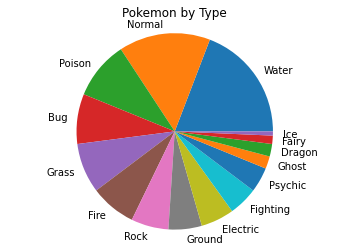

In [4]:
# pie chart of distribution of pokemon types
#take "primary" column, create lists to plot
types = pokemon_csv["primary"].value_counts(dropna=False).keys().tolist()
counts = pokemon_csv["primary"].value_counts(dropna=False).tolist()

# Plot
plt.pie(counts, labels=types, labeldistance=1.1)
plt.title("Pokemon by Type")
plt.axis('equal')
plt.savefig("Saved_Figures/pie_type")
plt.show()

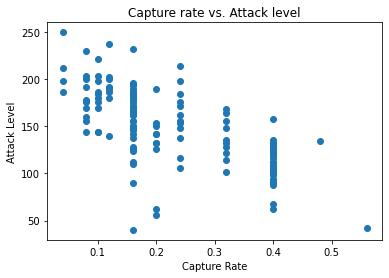

In [5]:
#Capture Rate v Attack Level 

plt.scatter(pokemon_csv['capture_rate'], pokemon_csv["atk"])
plt.title('Capture rate vs. Attack level')
plt.xlabel('Capture Rate')
plt.ylabel('Attack Level')
plt.savefig("Saved_Figures/capture_v_attack")
plt.show()

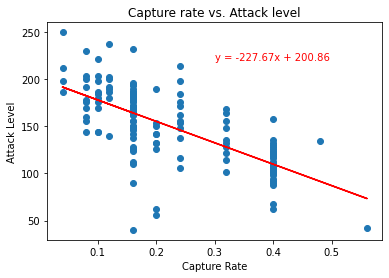

In [6]:
#Capture Rate v Attack Level with linregress line

#lin regress equation
x_data= pokemon_csv['capture_rate']
y_data= pokemon_csv["atk"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting graph
plt.scatter(pokemon_csv['capture_rate'], pokemon_csv["atk"])
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq,(.3,220), color='red')
plt.title('Capture rate vs. Attack level')
plt.xlabel('Capture Rate')
plt.ylabel('Attack Level')
plt.savefig("Saved_Figures/cature_v_attack_linreg")
plt.show()


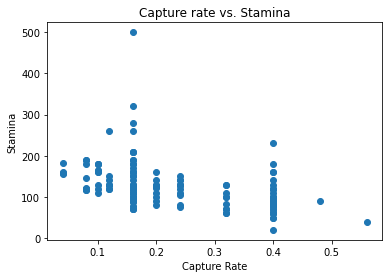

In [7]:
#Capture Rate v Stamina

plt.scatter(pokemon_csv['capture_rate'], pokemon_csv["stamina"])
plt.title('Capture rate vs. Stamina')
plt.xlabel('Capture Rate')
plt.ylabel('Stamina')
plt.savefig("Saved_Figures/capture_v_stamina")
plt.show()

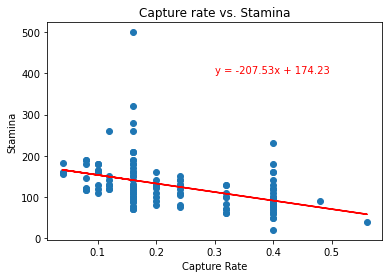

In [8]:
#Capture Rate v Stamina with linregress line

#lin regress equation
x_data2= pokemon_csv['capture_rate']
y_data2= pokemon_csv["stamina"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data2, y_data2)
regress_values = x_data2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting graph
plt.scatter(pokemon_csv['capture_rate'], pokemon_csv["stamina"])
plt.plot(x_data, regress_values, "r-")
plt.annotate(line_eq,(.3,400), color='red')
plt.title('Capture rate vs. Stamina')
plt.xlabel('Capture Rate')
plt.ylabel('Stamina')
plt.savefig("Saved_Figures/capture_v_stamina_linreg")
plt.show()


In [9]:
poketype = pokemon_csv.groupby('primary')
spawn_chance = poketype['spawn_chance'].mean()
spawn_df = spawn_chance.rename_axis('Primary').to_frame('Average Spawn Chance')
spawn_df.sort_values(by='Average Spawn Chance', ascending = False)

,Average Spawn Chance
Primary,
Normal,183.872273
Bug,139.733333
Poison,88.879286
Water,74.206786
Psychic,62.790000
Fairy,46.600000
Ground,35.537500
Ice,35.000000
Grass,34.105000


In [10]:
avg_cp = poketype['cp'].mean()
cp_df = avg_cp.rename_axis('Primary').to_frame('Average CP')
cp_df.sort_values(by='Average CP', ascending = True)

,Average CP
Primary,
Bug,1219.000000
Ground,1299.125000
Psychic,1392.666667
Normal,1413.227273
Ghost,1431.000000
Electric,1564.625000
Poison,1575.142857
Rock,1588.111111
Fighting,1610.428571


In [23]:
color_dict = {'Bug': 'lightgreen', 'Dragon': 'darkpurple', 'Electric': 'yellow', 'Fairy': 'lightpink', 
             'Fighting': 'darkred', 'Fire': 'orange', 'Ghost': 'purple', 'Grass': 'lightgreen', 'Ground': 'lightbrown',
             'Ice': 'lightblue', 'Normal': 'grey', 'Poison': 'lightpurple', 'Rock': 'brown', 'Water': 'lightblue'}

Text(0, 0.5, 'Average Spawn Chance')

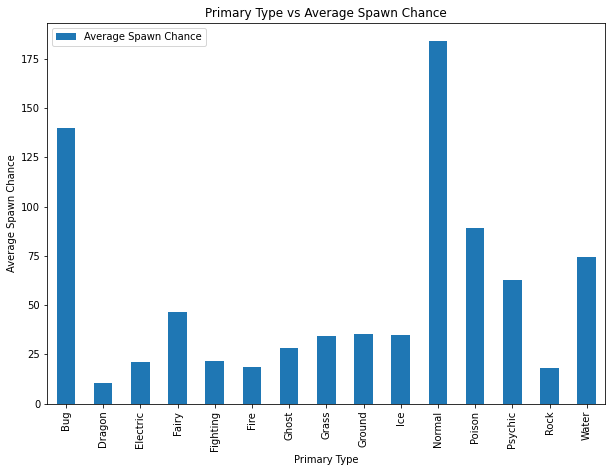

In [25]:
spawn_df.plot(kind='bar', figsize=(10,7))
plt.title('Primary Type vs Average Spawn Chance')
plt.xlabel('Primary Type')
plt.ylabel('Average Spawn Chance')

Text(0, 0.5, 'Average CP')

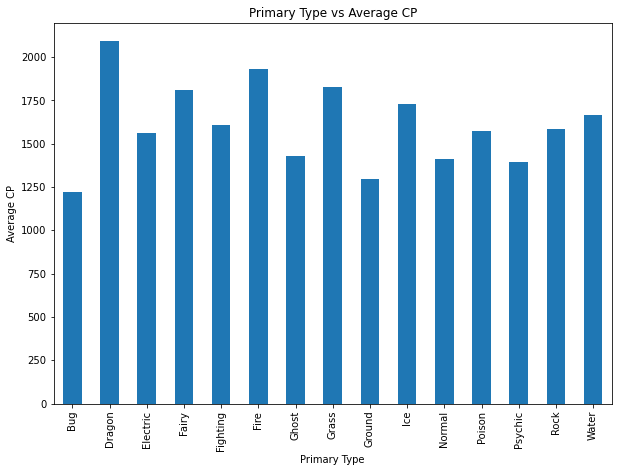

In [13]:
avg_cp.plot(kind='bar', figsize=(10,7))
plt.title('Primary Type vs Average CP')
plt.xlabel('Primary Type')
plt.ylabel('Average CP')

In [17]:
capture_rate = poketype['capture_rate'].mean()
capture_df = capture_rate.rename_axis('Primary').to_frame('Average Capture Rate')
capture_df.sort_values(by='Average Capture Rate', ascending = False)

,Average Capture Rate
Primary,
Ground,0.265000
Poison,0.260000
Psychic,0.250000
Water,0.247857
Normal,0.246364
Bug,0.243333
Ice,0.240000
Fighting,0.225714
Grass,0.225000


Text(0, 0.5, 'Average Capture Rate')

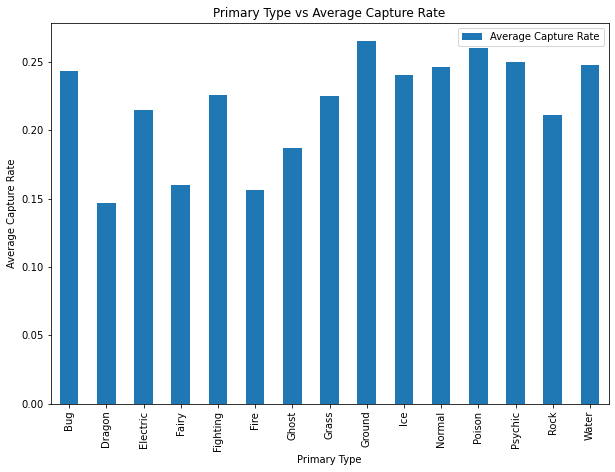

In [16]:
capture_df.plot(kind='bar', figsize=(10,7))
plt.title('Primary Type vs Average Capture Rate')
plt.xlabel('Primary Type')
plt.ylabel('Average Capture Rate')